# Pathways

We'll introduce the concept of pathways from nwgraph. We have 3 type of path concepts:
- `Pathway`
- `PathwayList`
- `ConvergingPathway`

A `Pathway` is briefly defined as a list of nodes, from left to right: `n1 -> n2 -> ... -> nk`.

A `PathwayList` is defined as a list of independent pathways. They may share some nodes, but not necessarily.

Finally, a `ConvergingPathway` is a list of pathways that `converge` on a singular node:
```
n1 -> n2 -\
            -> n
m1 -> m2 -/
```

Furthermore, all these objects support `graphviz`, so we can plot them. This is useful for debugging and visualisation.

In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

from nwgraph.pathway import Pathway as P, PathwayList as PL, ConvergingPathways as CP

### Pathway

Let's start with a simple pathway

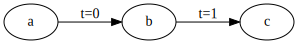

In [2]:
p = P(["a", "b", "c"])
display(p.to_graphviz())

## PathwayList

As explained earlier, a `PathwayList` is simply a list of independent, or not, pathways, put together in the same list.
Due to graphviz restrictions, the pathways are shown together. We can live with that.

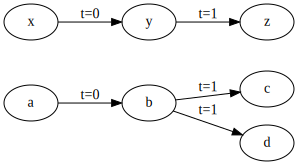

In [3]:
p1 = P(["a", "b", "c"])
p2 = P(["a", "b", "d"])
p3 = P(["x", "y", "z"])
pathway_list = PL([p1, p2, p3])
display(pathway_list.to_graphviz())

### ConvergingPathways

Finally, converging pathways are an extention of a regular pathway, where all the nodes **converge** to a singular node.

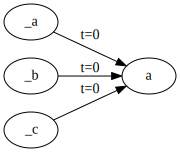

In [4]:
cp = CP([P(["_a", "a"]), P(["_b", "a"]), P(["_c", "a"])])
display(cp.to_graphviz())

We can even make ConvergingPatways of converging pathways!

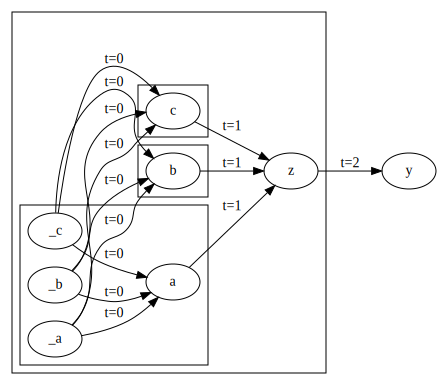

In [5]:
converging_path = CP([
    P([CP([P(["_a", "a"]), P(["_b", "a"]), P(["_c", "a"])]), "z"]),
    P([CP([P(["_a", "b"]), P(["_b", "b"]), P(["_c", "b"])]), "z"]),
    P([CP([P(["_a", "c"]), P(["_b", "c"]), P(["_c", "c"])]), "z"]),
])
path = P([converging_path, "y"])
display(path.to_graphviz())

### Combining 2 pathways, 1 Convergent, 1 simple in a PathwayList

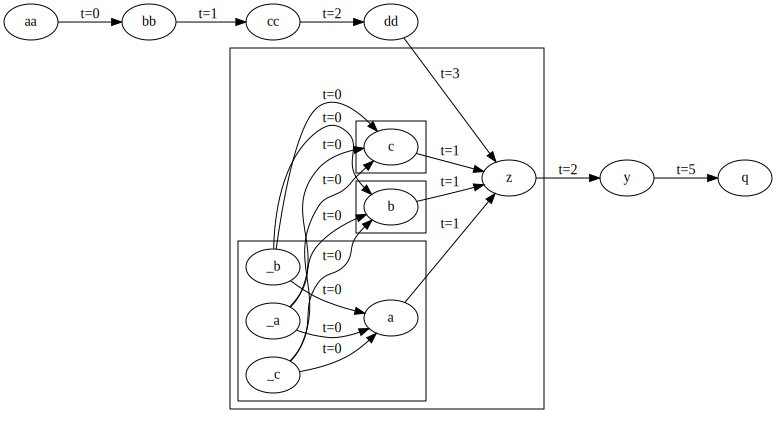

In [6]:
p1 = P([
    CP([
        P([CP([P(["_a", "a"]), P(["_b", "a"]), P(["_c", "a"])]), "z"]),
        P([CP([P(["_a", "b"]), P(["_b", "b"]), P(["_c", "b"])]), "z"]),
        P([CP([P(["_a", "c"]), P(["_b", "c"]), P(["_c", "c"])]), "z"]),
    ]),
    "y"
])
p2 = P(["aa", "bb", "cc", "dd", "z", "y", "q"])
pathway_list = PL([p1, p2])
display(pathway_list.to_graphviz())


For the previous plot, we observe a visual bug. It may be solvable, but it requires us to double the edge between z->y.
Basically, z->y is both at t=2 and t=5, but only one is shown. We can see that it's only a visual bug, since y->q
properly shows t=5. We can also see this if we were to plot all the `partial_pathways` of the pathway list.

### Pathways with a delay

We are going to make a ConvergingPathway, where one Pathway branch is delayed. Delays are necessary in this case
because all the components of a CP must have the same number of steps.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


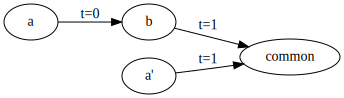

In [7]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

p1 = P(["a", "b", "common"])
p2 = P(["a'", "common"], delay=1)

try:
    CP([p, P(["a'", "common"])])
except ValueError:
    pass

cp = CP([p1, p2])
display(cp.to_graphviz())


We can also have CPs of multiple levels, all with delays.

2


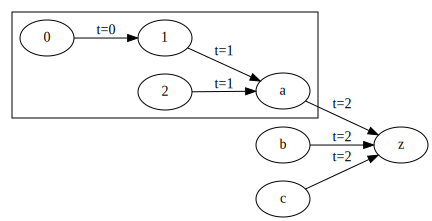

In [8]:
converging_path = CP([
    P([CP([P(["0", "1", "a"]), P(["2", "a"], delay=1)]), "z"]),
    P(["b", "z"], delay=2),
    P(["c", "z"], delay=2)
])

print(P(["2", "a"], delay=1).n_steps)

converging_path.to_graphviz()

Further more, we can add delay at multiple levels as well. The current implementation will delay the entire Pathway.

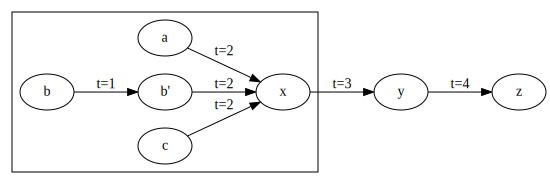

In [9]:
p = P([CP([P(["a", "x"], delay=1), P(["b", "b'", "x"]), P(["c", "x"], delay=1)]), "y", "z"], delay=1)
display(p.to_graphviz())